###Explatory Data Analysis

dataset - data_processed.csv


Importing necessary libraries for plotting the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change the following to path to place where your data is stored

In [ ]:
path = '/content/drive/My Drive/data_processed.csv'

Loading initial data

In [ ]:
df = pd.read_csv(path)
df.head()

,restaurant_id,location,_id,review_count,PriceRange,menu,address,attributes,borough,name,cuisine,stars
0,40367442,"{'coordinates': [-74.1350211, 40.6369042], 'ty...",{'$oid': '6095a34a7c34416a90d3209e'},62,2.0,"['Grilled cheese sandwich', 'Baked potato', 'L...","{'building': '17', 'coord': [-74.1350211, 40.6...","{'Alcohol': ""'beer_and_wine'"", 'Ambience': ""{'...",Staten Island,Buddy'S Wonder Bar,American,3.5
1,40364610,"{'coordinates': [-74.138263, 40.546681], 'type...",{'$oid': '6095a34a7c34416a90d31ff6'},72,1.0,"['Mozzarella sticks', 'Mushroom swiss burger',...","{'building': '37', 'coord': [-74.138263, 40.54...","{'Alcohol': ""'none'"", 'Ambience': ""{'touristy'...",Staten Island,Great Kills Yacht Club,American,4.0
2,40365288,"{'coordinates': [-73.97063700000001, 40.751495...",{'$oid': '6095a34a7c34416a90d32017'},149,2.0,"['French fries', 'Chicken pot pie', 'Mac & che...","{'building': '842', 'coord': [-73.970637000000...","{'Alcohol': None, 'Ambience': ""{'touristy': Fa...",Manhattan,Keats Restaurant,American,4.0
3,40363151,"{'coordinates': [-73.9998042, 40.7251256], 'ty...",{'$oid': '6095a34a7c34416a90d31fbd'},7,1.0,"['doughnuts', 'chocolate chip cookies', 'choco...","{'building': '120', 'coord': [-73.9998042, 40....","{'Alcohol': None, 'Ambience': None, 'BYOB': No...",Manhattan,Olive'S,Bakery,5.0
4,30075445,"{'coordinates': [-73.856077, 40.848447], 'type...",{'$oid': '6095a34a7c34416a90d31f7d'},39,2.0,"['Chocolate strawberries', 'Chocolate lava cak...","{'building': '1007', 'coord': [-73.856077, 40....","{'Alcohol': ""u'none'"", 'Ambience': ""{'romantic...",Bronx,Morris Park Bake Shop,Bakery,4.0


In [ ]:
df.shape

(12775, 12)

In [ ]:
df.columns

Index(['restaurant_id', 'location', '_id', 'review_count', 'PriceRange',
       'menu', 'address', 'attributes', 'borough', 'name', 'cuisine', 'stars'],
      dtype='object')

In [ ]:
df.dtypes

,0
restaurant_id,int64
location,object
_id,object
review_count,int64
PriceRange,float64
menu,object
address,object
attributes,object
borough,object
name,object


Checking for null values

In [ ]:
df.isnull().sum()

,0
restaurant_id,0
location,0
_id,0
review_count,0
PriceRange,0
menu,0
address,0
attributes,0
borough,0
name,0


### Plots

From the above data, the columns PriceRange, stars, and review_count are numerical. Hence using a boxplot to check for the presence of any outliers

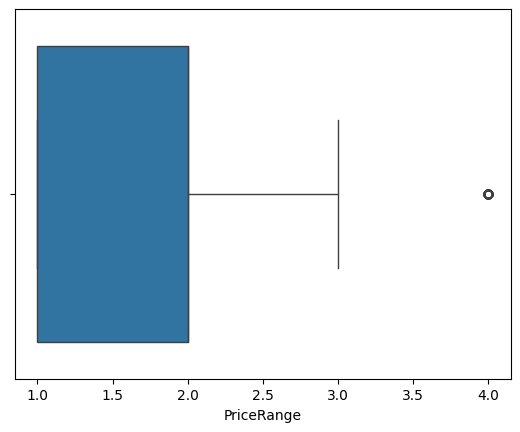

In [ ]:
sns.boxplot(x = df['PriceRange'])

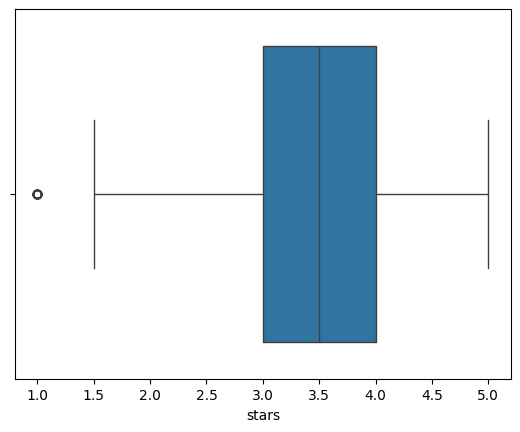

In [ ]:
sns.boxplot(x = df['stars'])

<Axes: xlabel='review_count'>

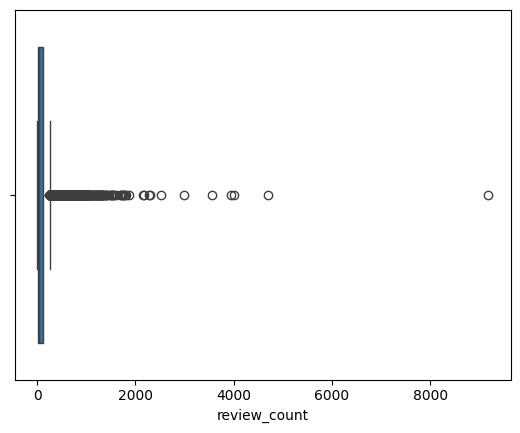

In [ ]:
sns.boxplot(x = df['review_count'])

Plotting the number of restaurants by borough (neighborhood) and cuisine to identify the most common options available

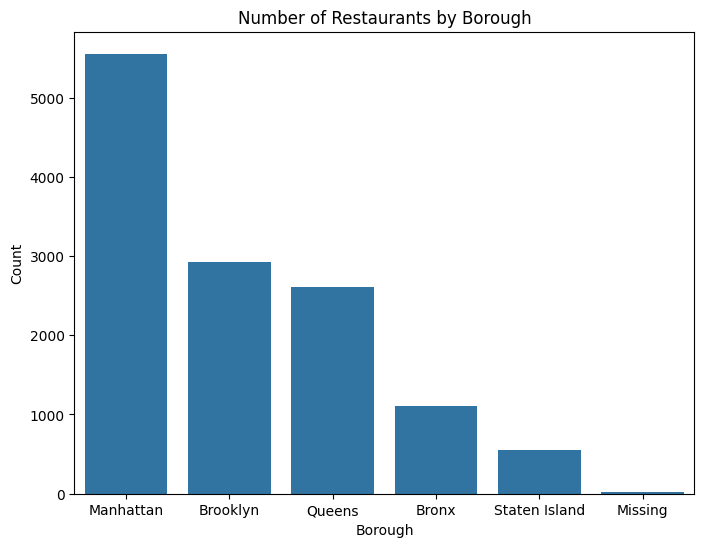

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='borough', order=df['borough'].value_counts().index)
plt.title('Number of Restaurants by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

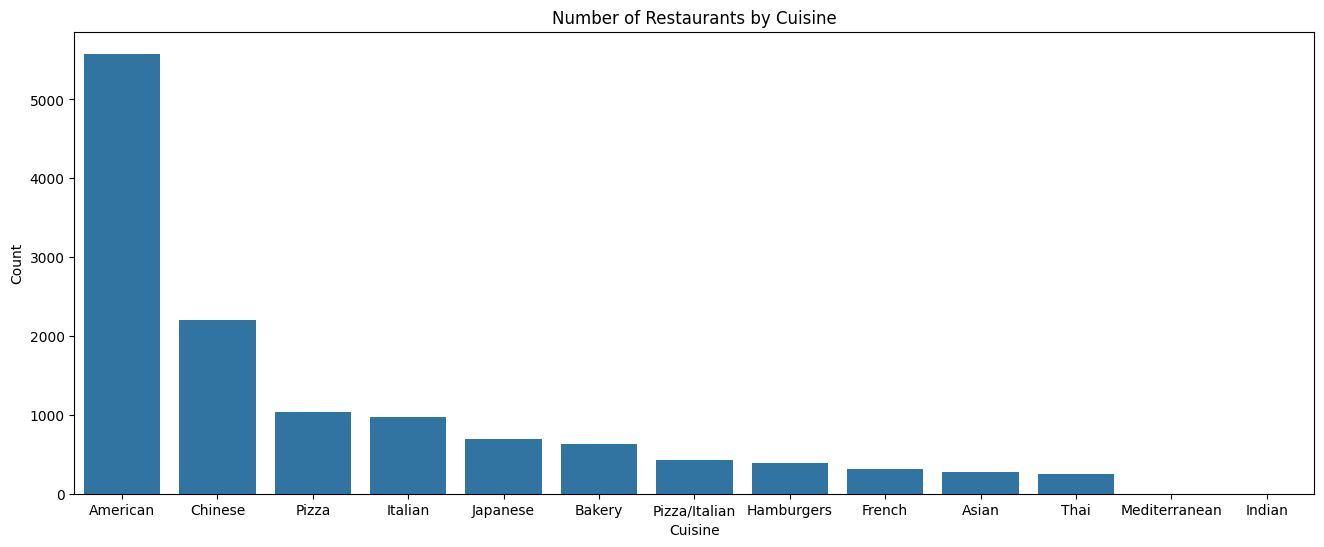

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='cuisine', order=df['cuisine'].value_counts().index)
plt.title('Number of Restaurants by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

Checking the relationship between all numerical values to understand their effect on one another

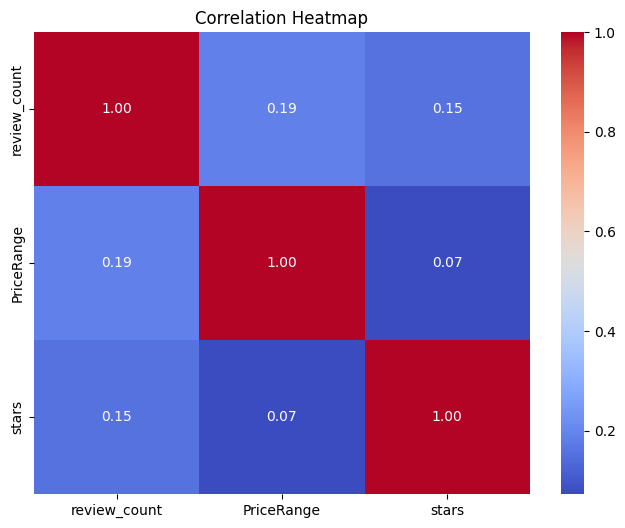

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['review_count', 'PriceRange', 'stars']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Plotting frequent menu items on wordcloud to understand which is the most available option.

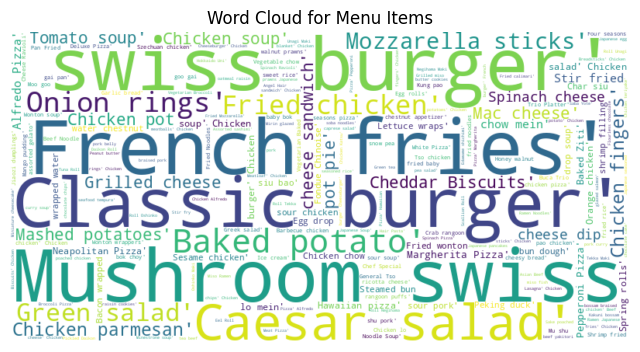

In [ ]:
from wordcloud import WordCloud
text = ' '.join(str(item) for item in df['menu'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Menu Items')
plt.show()